In [7]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [4]:

# CREATE NETWORK GML
csv_file = "pharma_prescriber_network_data_weights_onlyopioid.csv"  
df = pd.read_csv(csv_file)

G = nx.from_pandas_edgelist(df, source='prscrbr_npi', target='labelname')

gml_file = "pharma_prescriber_network_data_weights_onlyopioid.gml" 
nx.write_gml(G, gml_file)

print(f"Graph saved to {gml_file}")


Graph saved to pharma_prescriber_network_data_weights_onlyopioid.gml


In [40]:
# Create a graph using the opioid_day_suply column as the weight
G_weighted = nx.from_pandas_edgelist(df, source='prscrbr_npi', target='labelname', edge_attr='total_opioid_payments')

# Save the graph to a new GML file
weighted_gml_file = "pharma_prescriber_network_data_weights_total_opioid_payments.gml"
nx.write_gml(G_weighted, weighted_gml_file)

print(f"Weighted graph saved to {weighted_gml_file}")

Weighted graph saved to pharma_prescriber_network_data_weights_total_opioid_payments.gml


In [ ]:
# Create a graph using the TOTAL OPIOID PAYMENTS column as the weight
G_weighted = nx.from_pandas_edgelist(df, source='prscrbr_npi', target='labelname', edge_attr='total_opioid_payments')

# Save the graph to a new GML file
weighted_gml_file = "pharma_prescriber_network_data_weights_total_opioid_payments.gml"
nx.write_gml(G_weighted, weighted_gml_file)

print(f"Weighted graph saved to {weighted_gml_file}")

{'Indivior Inc.': Text(0.20362941920757294, 0.48912185430526733, 'Indivior Inc.'),
 'Mylan Pharmaceuticals Inc.': Text(0.24084611237049103, -0.0557810515165329, 'Mylan Pharmaceuticals Inc.'),
 'Orexo US, Inc.': Text(0.11887498944997787, 0.8723057508468628, 'Orexo US, Inc.'),
 'Purdue Pharma L.P.': Text(-0.048359327018260956, -0.12669599056243896, 'Purdue Pharma L.P.'),
 'Sentynl Therapeutics, Inc.': Text(-0.02316492237150669, 0.17190682888031006, 'Sentynl Therapeutics, Inc.')}

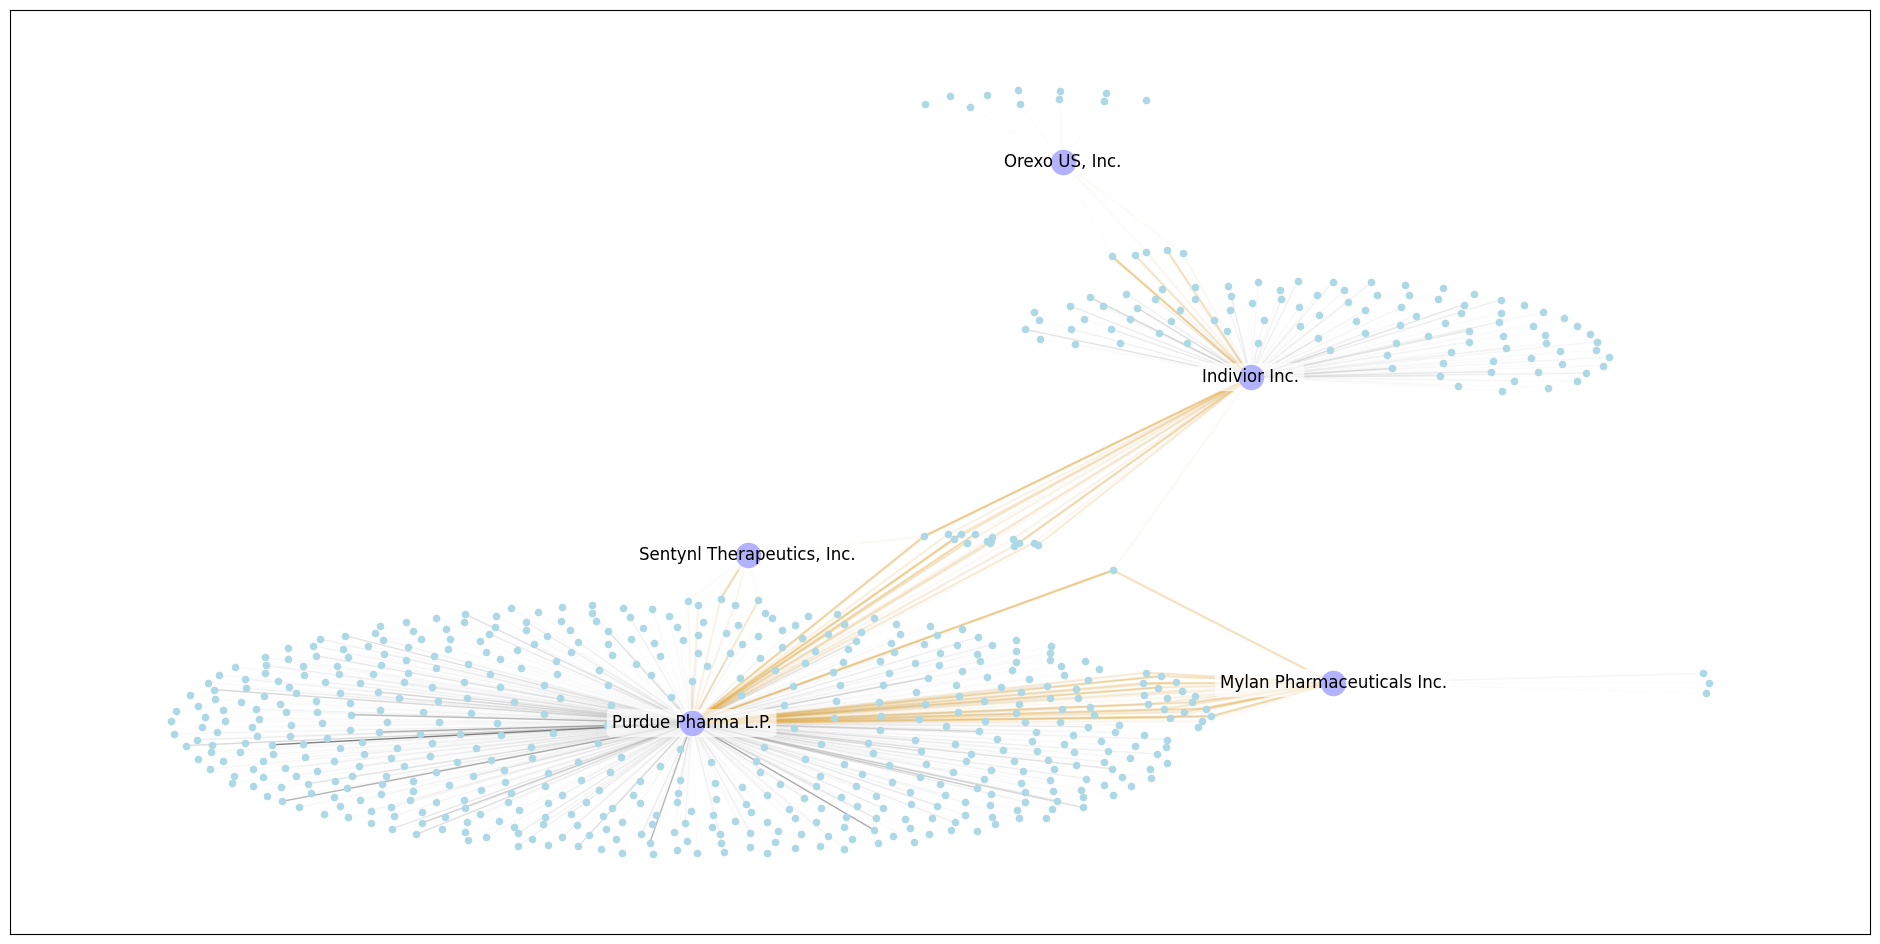

In [ ]:
# STANDARD WITH WEIGHT SHADING (RUN THIS AFTER BELOW CELL)

plt.figure(figsize=(24, 12))

# Normalize weights for alpha mapping
alpha_norm = mcolors.Normalize(vmin=min_weight, vmax=max_weight)

# Generate edge alphas based on weights
weights = nx.get_edge_attributes(G_loaded, 'opioid_day_suply')
edge_alphas = [alpha_norm(weights[edge]) for edge in G_loaded.edges if edge in weights]

# Draw edges with varying alpha
nx.draw_networkx_edges(G_loaded, pos, edge_color='gray', alpha=edge_alphas)

# Highlight edges connected to high-degree doctor_nodes with varying alpha
high_degree_edge_alphas = [alpha_norm(weights[edge]) if edge in weights else 1.0 for edge in high_degree_edges]
nx.draw_networkx_edges(G_loaded, pos, edgelist=high_degree_edges, edge_color='orange', alpha=high_degree_edge_alphas, width=2)

nx.draw_networkx_nodes(G_loaded, pos, nodelist=pharma_nodes, node_color='blue', node_size=300)
nx.draw_networkx_nodes(G_loaded, pos, nodelist=doctor_nodes, node_color='lightblue', node_size=20)

pharma_labels = {node: node for node in pharma_nodes}
nx.draw_networkx_labels(G_loaded, pos, labels=pharma_labels, font_size=12, font_color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7))



{'Indivior Inc.': Text(0.20362941920757294, 0.48912185430526733, 'Indivior Inc.'),
 'Mylan Pharmaceuticals Inc.': Text(0.24084611237049103, -0.0557810515165329, 'Mylan Pharmaceuticals Inc.'),
 'Orexo US, Inc.': Text(0.11887498944997787, 0.8723057508468628, 'Orexo US, Inc.'),
 'Purdue Pharma L.P.': Text(-0.048359327018260956, -0.12669599056243896, 'Purdue Pharma L.P.'),
 'Sentynl Therapeutics, Inc.': Text(-0.02316492237150669, 0.17190682888031006, 'Sentynl Therapeutics, Inc.')}

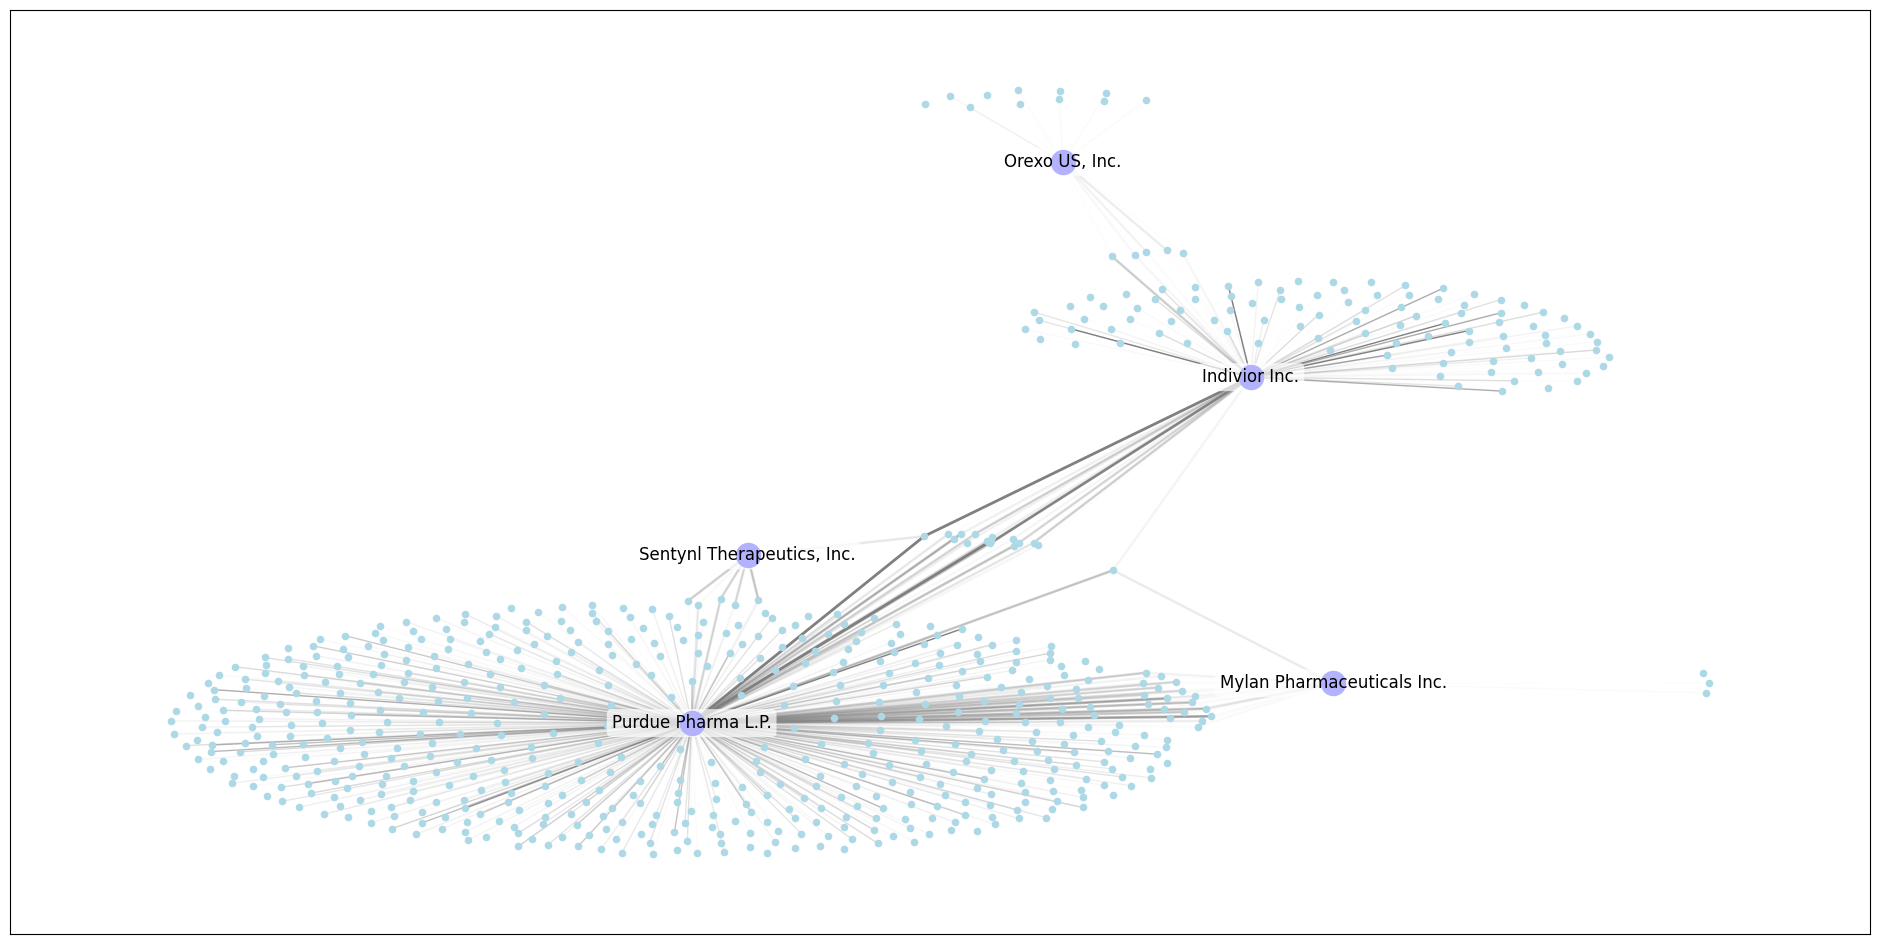

In [ ]:
# STANDARD WITH WEIGHT SHADING TOTAL OPIOID PAYMENTS (RUN THIS AFTER BELOW CELL)
G_loaded2 = nx.read_gml("pharma_prescriber_network_data_weights_total_opioid_payments.gml")

plt.figure(figsize=(24, 12))

pos2 = nx.spring_layout(G_loaded2, seed=42)

# Normalize weights for alpha mapping
weights = nx.get_edge_attributes(G_loaded2, 'total_opioid_payments')
alpha_norm2 = mcolors.Normalize(vmin=10.42, vmax=800, clip=True)  # Adjust vmin and vmax based on your data range

# Generate edge alphas based on weights
edge_alphas2 = [alpha_norm2(weights[edge]) for edge in G_loaded2.edges if edge in weights]
# Draw edges with varying alpha
nx.draw_networkx_edges(G_loaded2, pos2, edge_color='gray', alpha=edge_alphas2)

# Highlight edges connected to high-degree doctor_nodes with varying alpha
high_degree_edge_alphas = [alpha_norm2(weights[edge]) if edge in weights else 1.0 for edge in high_degree_edges]
nx.draw_networkx_edges(G_loaded2, pos2, edgelist=high_degree_edges, edge_color='gray', alpha=high_degree_edge_alphas, width=2)

nx.draw_networkx_nodes(G_loaded2, pos2, nodelist=pharma_nodes, node_color='blue', node_size=300)
nx.draw_networkx_nodes(G_loaded2, pos2, nodelist=doctor_nodes, node_color='lightblue', node_size=20)

pharma_labels = {node: node for node in pharma_nodes}
nx.draw_networkx_labels(G_loaded2, pos2, labels=pharma_labels, font_size=12, font_color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7))



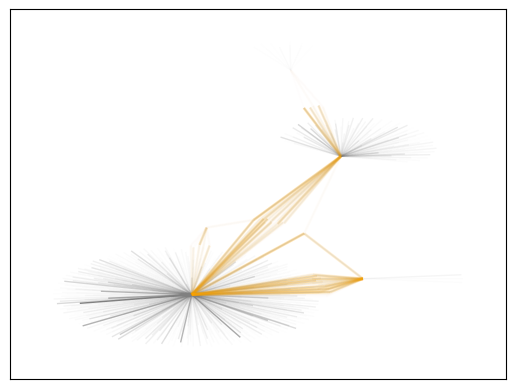

In [53]:
# ONLY THE EDGES (DON'T RUN THIS)
# Normalize weights for alpha mapping
alpha_norm = mcolors.Normalize(vmin=min_weight, vmax=max_weight)

# Generate edge alphas based on weights
edge_alphas = [alpha_norm(weights[edge]) for edge in G_loaded.edges if edge in weights]

# Draw edges with varying alpha
nx.draw_networkx_edges(G_loaded, pos, edge_color='gray', alpha=edge_alphas)

# Highlight edges connected to high-degree doctor_nodes with varying alpha
high_degree_edge_alphas = [alpha_norm(weights[edge]) if edge in weights else 1.0 for edge in high_degree_edges]
nx.draw_networkx_edges(G_loaded, pos, edgelist=high_degree_edges, edge_color='orange', alpha=high_degree_edge_alphas, width=2)

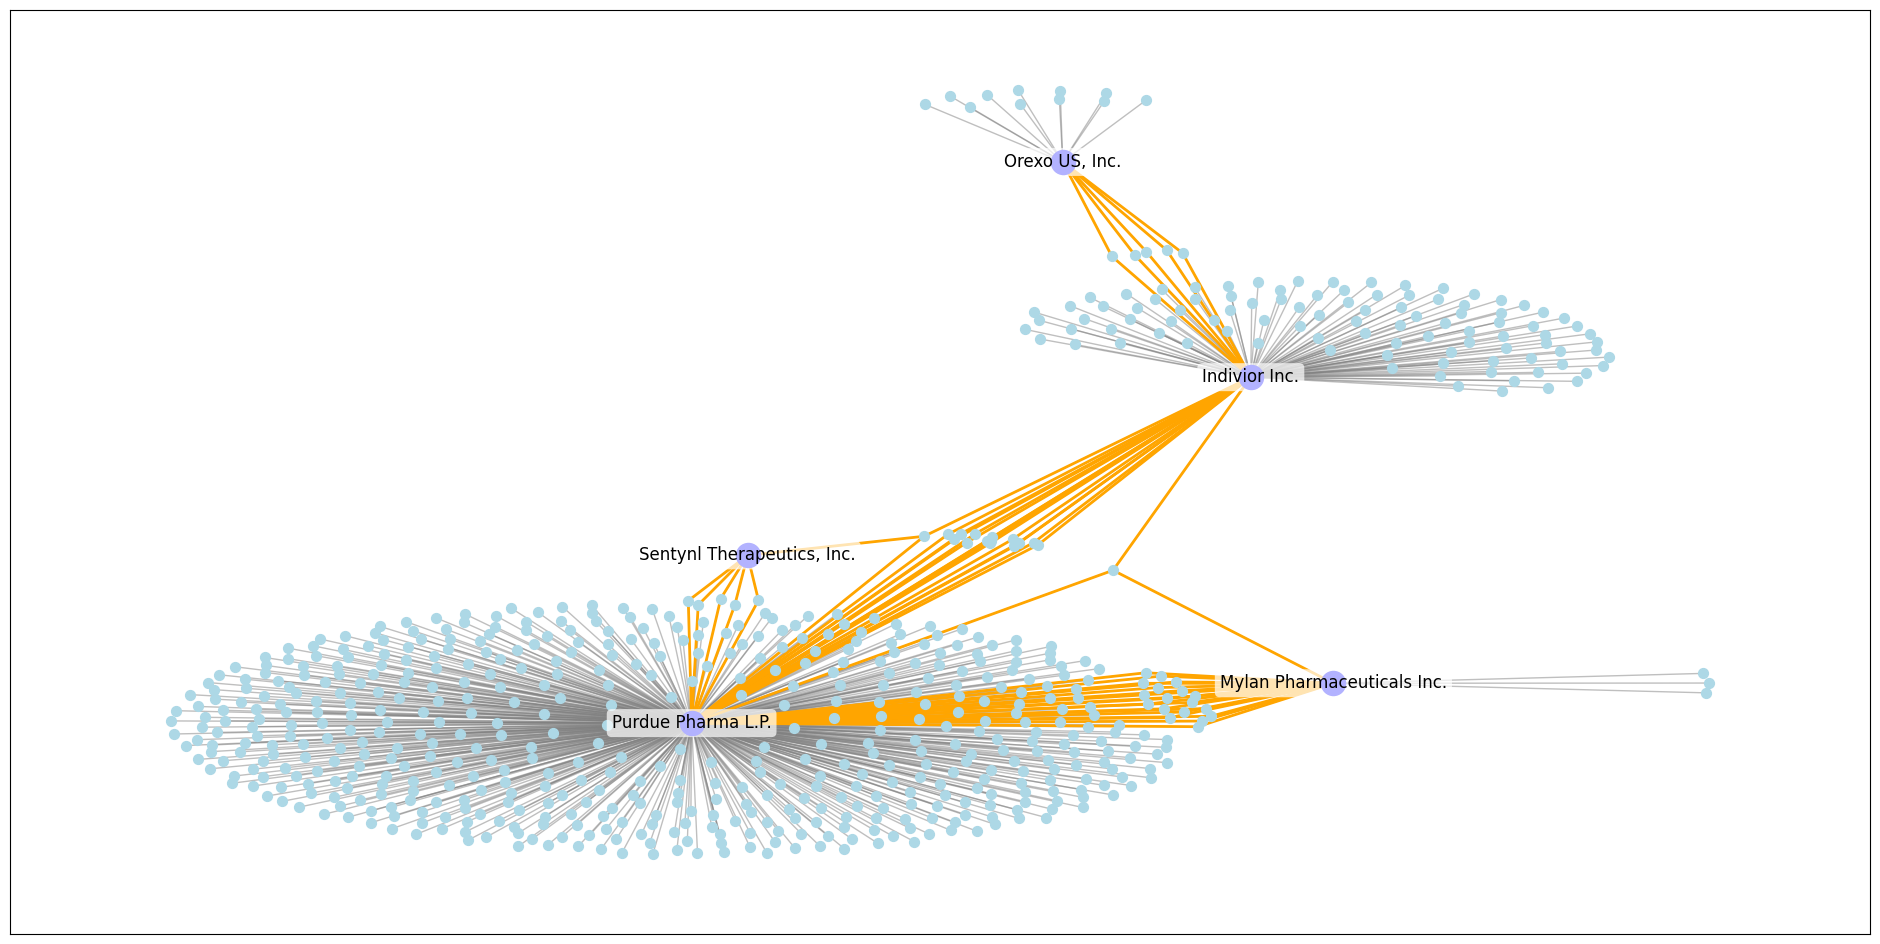

In [5]:
# STANDARD NETWORK VISUALIZATION (RUN THIS FIRST)

# Load the graph from the GML file
G_loaded = nx.read_gml("pharma_prescriber_network_data_weights_total_opioid_payments.gml")

# Separate nodes into pharma_nodes and doctor_nodes
pharma_nodes = [node for node in G_loaded.nodes if isinstance(node, str) and not node.isdigit()]
doctor_nodes = [node for node in G_loaded.nodes if node not in pharma_nodes]

# Identify high-degree doctor_nodes
high_degree_doctor_nodes = [node for node in doctor_nodes if G_loaded.degree(node) > 1]

# Highlight edges connected to high-degree doctor_nodes
high_degree_edges = [(u, v) for u, v in G_loaded.edges() if u in high_degree_doctor_nodes or v in high_degree_doctor_nodes]

# Generate a layout for the graph
pos = nx.spring_layout(G_loaded, seed=42)

plt.figure(figsize=(24, 12))

# Draw pharma_nodes
nx.draw_networkx_nodes(G_loaded, pos, nodelist=pharma_nodes, node_color='blue', node_size=300)

# Draw doctor_nodes
nx.draw_networkx_nodes(G_loaded, pos, nodelist=doctor_nodes, node_color='lightblue', node_size=50)

# Draw edges
nx.draw_networkx_edges(G_loaded, pos, edge_color='gray', alpha=0.5)

# Highlight edges connected to high-degree doctor_nodes
nx.draw_networkx_edges(G_loaded, pos, edgelist=high_degree_edges, edge_color='orange', width=2)

# Add labels only for pharma_nodes
pharma_labels = {node: node for node in pharma_nodes}
nx.draw_networkx_labels(G_loaded, pos, labels=pharma_labels, font_size=12, font_color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7))

plt.show()

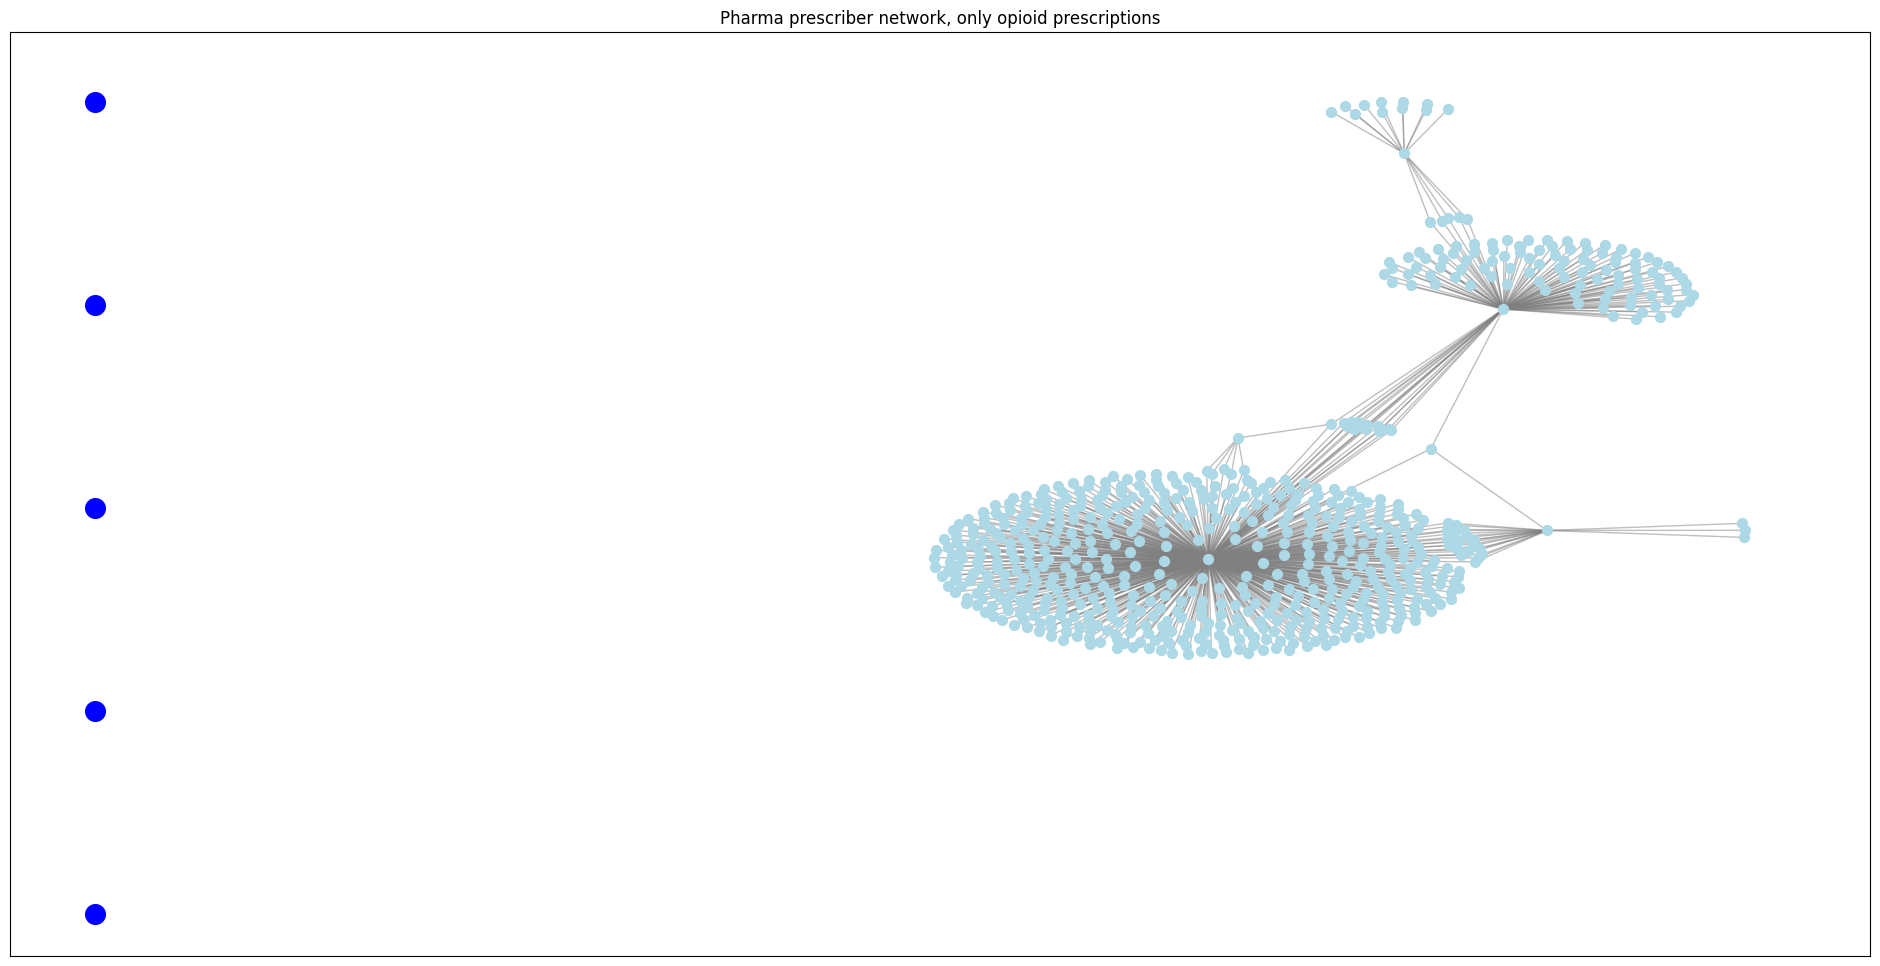

In [24]:
import networkx as nx

import matplotlib.pyplot as plt

# Load the graph from the GML file
G_loaded = nx.read_gml("pharma_prescriber_network_data_weights_onlyopioid.gml")

# Generate a spring layout for the graph
pos = nx.spring_layout(G_loaded, seed=42)

plt.figure(figsize=(24, 12))

# Separate nodes into labelname nodes and prscrbr_npi nodes
labelname_nodes = [1, 15, 1539, 1995, 1996]
labels = {
    1: "Akrimax Pharmaceuticals",
    15: "BioDelivery Sciences International",
    1539: "Mylan Pharmaceuticals",
    1995: "Purdue Pharma",
    1996: "Sentynl Therapeutics",
}
fixed_positions = {
    1: (-1, 1),
    15: (-1, 0.5),
    1539: (-1, 0),
    1995: (-1, -0.5),
    1996: (-1, -1),
}

# Combine fixed positions with spring layout positions
pos.update(fixed_positions)

prscrbr_npi_nodes = [node for node in G_loaded.nodes if node not in labelname_nodes]

# Draw nodes
nx.draw_networkx_nodes(G_loaded, pos,  nodelist = labelname_nodes , node_color='blue', node_size=200)
nx.draw_networkx_nodes(G_loaded, pos, nodelist = prscrbr_npi_nodes, node_color='lightblue', node_size=50)

# Draw edges
nx.draw_networkx_edges(G_loaded, pos, edge_color='gray', alpha=0.5)

plt.title("Pharma prescriber network, only opioid prescriptions")
plt.show()

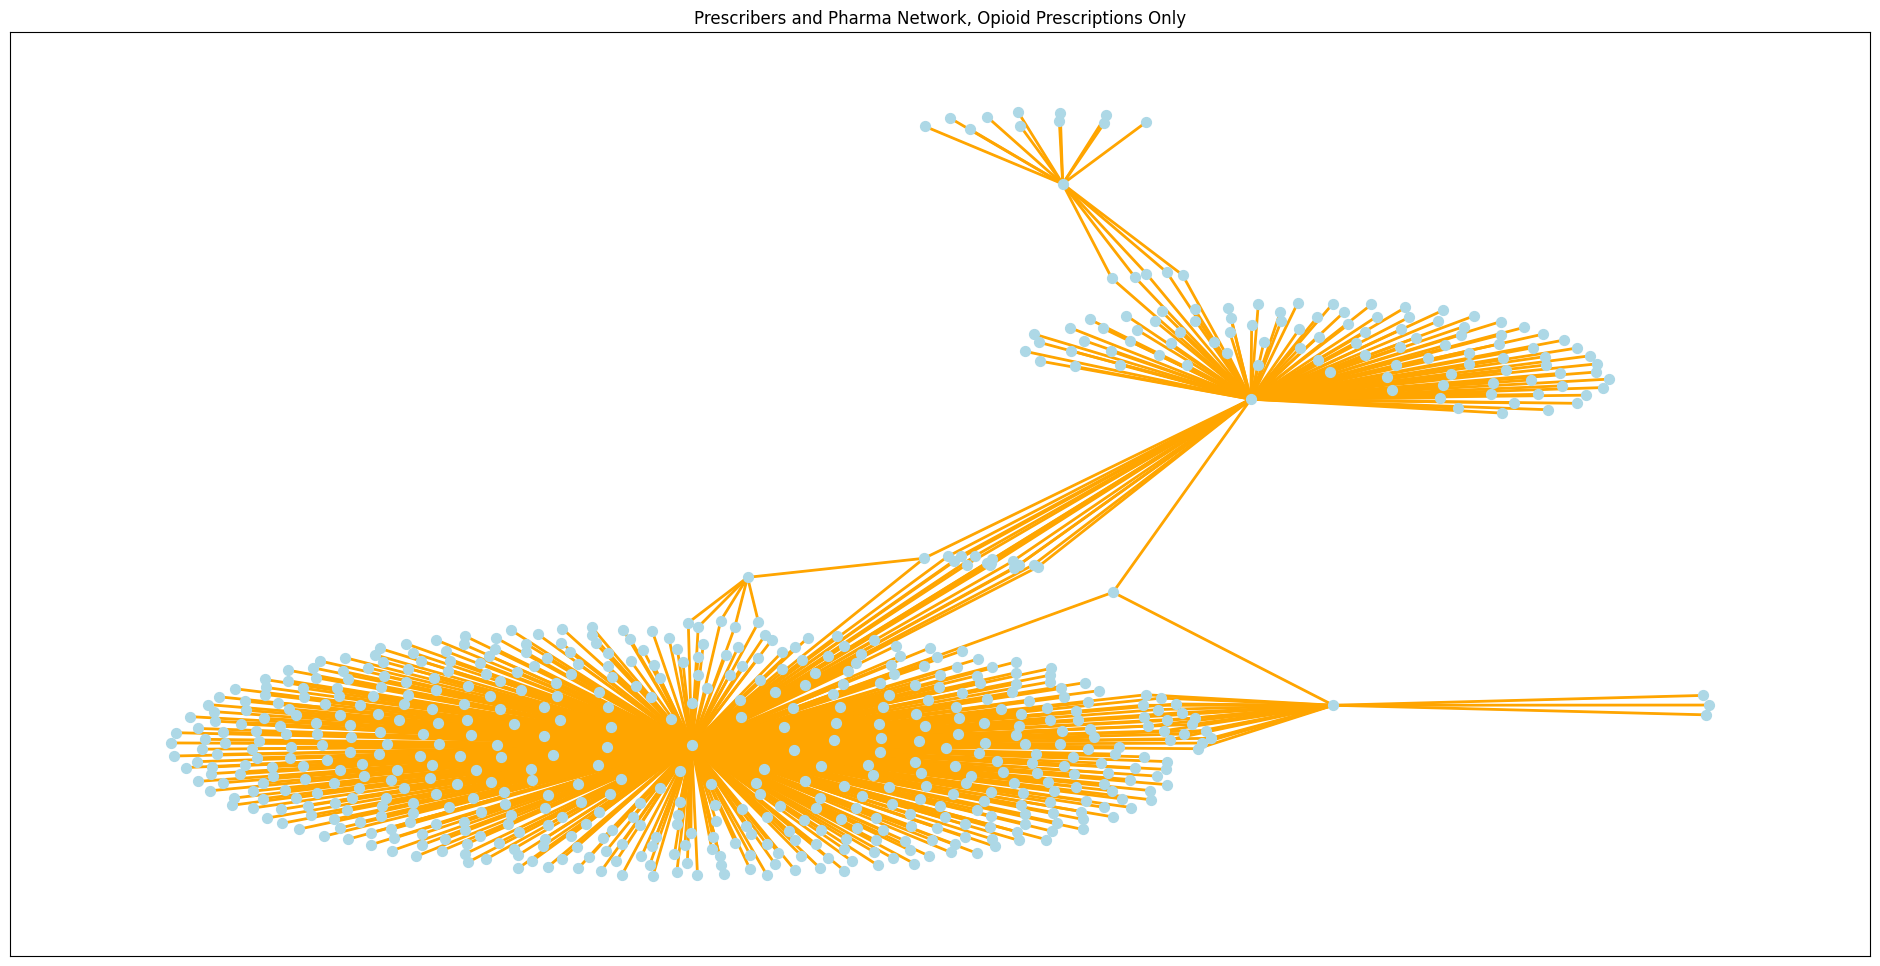

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import math

# Load the graph from the GML file
G_loaded = nx.read_gml("pharma_prescriber_network_data_weights_onlyopioid.gml")

# Remove specific prescriber nodes from the graph
nodes_to_remove = ["Purdue Transdermal Technologies L.P.", "Mallinckrodt LLC"]
prscrbr_npi_nodes = [node for node in G_loaded.nodes if node not in labels]
isolated_prscrbr_npi_nodes = [node for node in prscrbr_npi_nodes if G_loaded.degree(node) == 0]
G_loaded.remove_nodes_from(isolated_prscrbr_npi_nodes)
G_loaded.remove_nodes_from(nodes_to_remove)

# Separate nodes into labelname nodes and prscrbr_npi nodes
labelname_nodes = [node for node in G_loaded.nodes if node in labels]
prscrbr_npi_nodes = [node for node in G_loaded.nodes if node not in labels]

# # Assign fixed positions for the 5 labelname_nodes
# # Define the parameters of the ellipse
# a = 1.0  # Semi-major axis (horizontal radius)
# b = 1 # Semi-minor axis (vertical radius)
# center_x, center_y = 0.0, 0.0  # Center of the ellipse

# # Calculate positions for labelname_nodes around the edges of the ellipse
# fixed_positions = {}
# num_nodes = len(labelname_nodes)
# for i, node in enumerate(labelname_nodes):
#     angle = 2 * math.pi * i / num_nodes  # Evenly distribute nodes along the ellipse
#     x = center_x + a * math.cos(angle)
#     y = center_y + b * math.sin(angle)
#     fixed_positions[node] = (x, y)

# # Generate circular layout for prscrbr_npi_nodes
# circular_positions = nx.circular_layout(prscrbr_npi_nodes)

# # Combine fixed positions for labelname_nodes with circular positions for prscrbr_npi_nodes
# pos = {}
# pos.update(fixed_positions)  # Add fixed positions for labelname_nodes
# pos.update(circular_positions)  # Add circular positions for prscrbr_npi_nodes

# Filter prscrbr_npi_nodes with degree > 1
high_degree_nodes = [node for node in prscrbr_npi_nodes if G_loaded.degree(node) > 1]

# Highlight edges connected to high-degree nodes
high_degree_edges = [(u, v) for u, v in G_loaded.edges() if u in high_degree_nodes or v in high_degree_nodes]

plt.figure(figsize=(24, 12))

# Draw the prscrbr_npi nodes
nx.draw_networkx_nodes(G_loaded, pos, nodelist=prscrbr_npi_nodes, node_color='lightblue', node_size=50)

# Draw the labelname nodes
nx.draw_networkx_nodes(G_loaded, pos, nodelist=labelname_nodes, node_color='blue', node_size=300)

# Draw edges
nx.draw_networkx_edges(G_loaded, pos, edge_color='gray', alpha=0.5)

# Highlight edges connected to high-degree nodes
nx.draw_networkx_edges(G_loaded, pos, edgelist=high_degree_edges, edge_color='orange', width=2)

# Create a filtered labels dictionary for labelname nodes only
filtered_labels = {node: labels[node] for node in labelname_nodes if node in labels}

# Draw labels only for labelname nodes
nx.draw_networkx_labels(G_loaded, pos, labels=filtered_labels, font_size=20, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7), verticalalignment='center', clip_on=True)

plt.title("Prescribers and Pharma Network, Opioid Prescriptions Only")
plt.show()

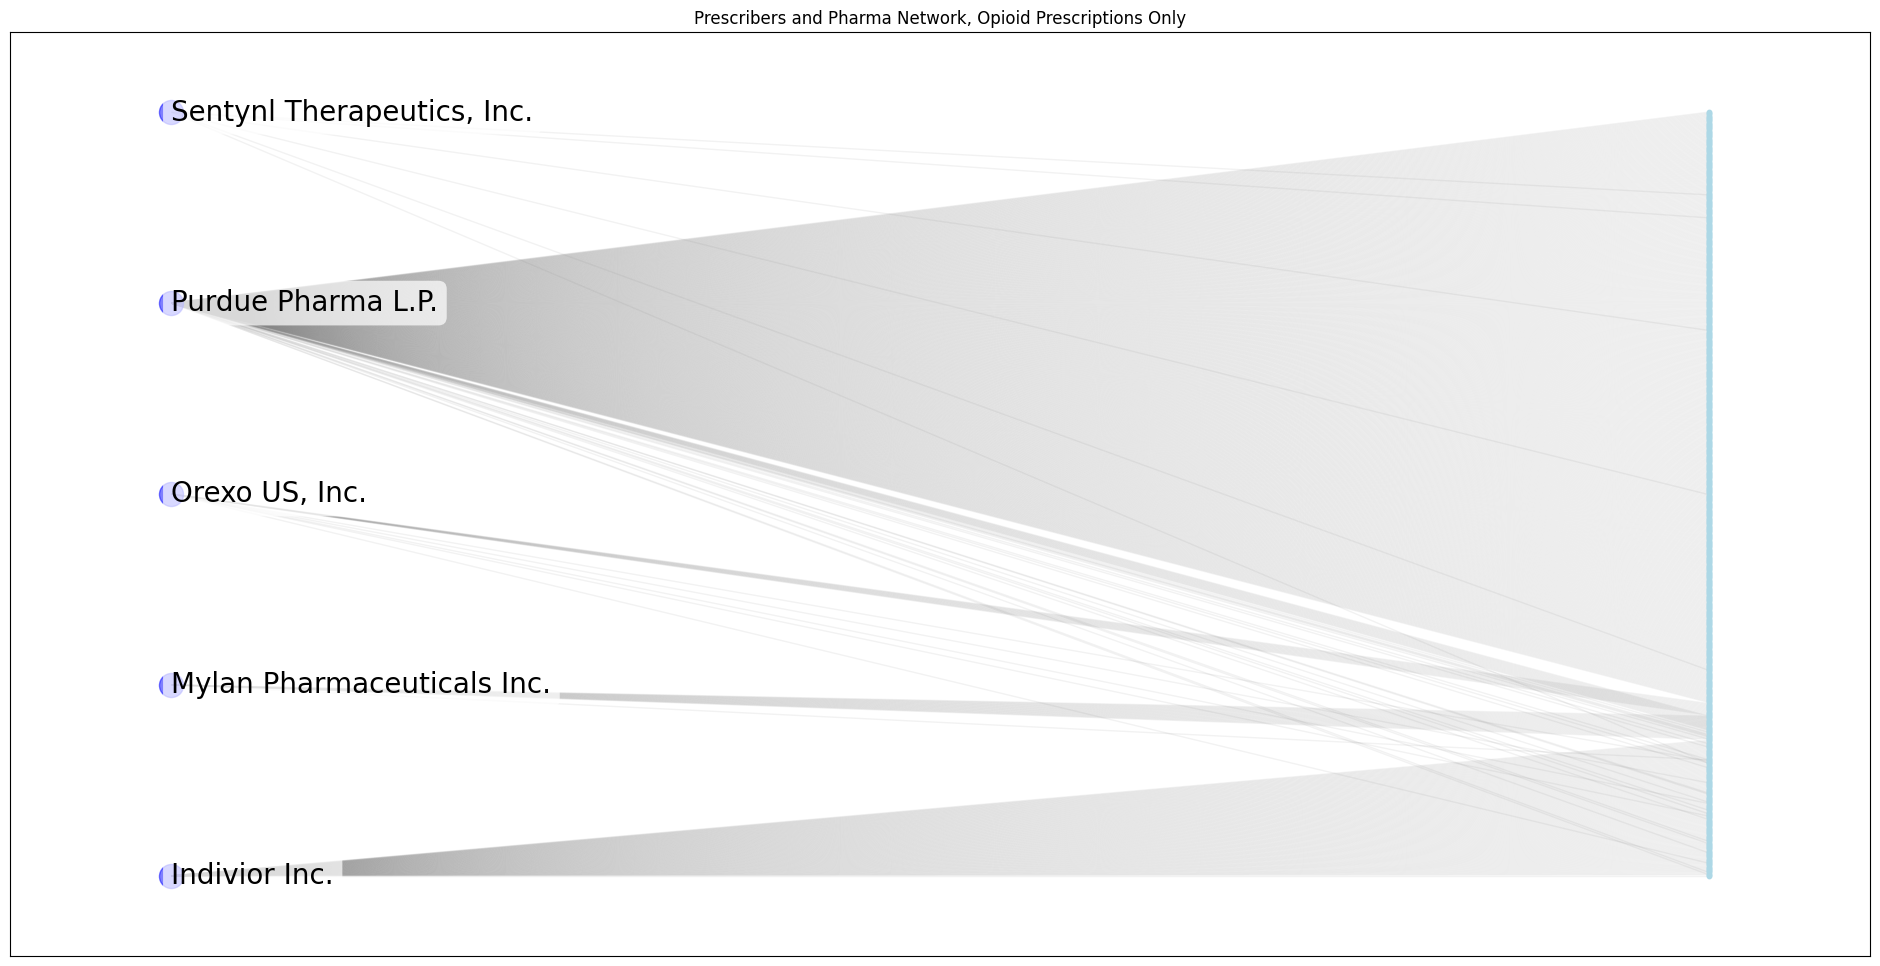

In [71]:
import matplotlib.pyplot as plt
import networkx as nx

# Load the graph from the GML file
G_loaded = nx.read_gml("pharma_prescriber_network_data_weights_onlyopioid.gml")

# Separate nodes into labelname nodes and prscrbr_npi nodes
labelname_nodes = [node for node in G_loaded.nodes if node in labels]
prscrbr_npi_nodes = [node for node in G_loaded.nodes if node not in labels]

# Manually assign positions
pos = {}

# Spread out labelname_nodes on the left (x=0) along the y-axis
for i, node in enumerate(labelname_nodes):
    y = i / (len(labelname_nodes) - 1) if len(labelname_nodes) > 1 else 0.5  # Evenly distribute y-coordinates
    pos[node] = (0, y)  # Place on the left side (x=0)

# Spread out prscrbr_npi_nodes on the right (x=1) along the y-axis
for i, node in enumerate(prscrbr_npi_nodes):
    y = i / (len(prscrbr_npi_nodes) - 1) if len(prscrbr_npi_nodes) > 1 else 0.5  # Evenly distribute y-coordinates
    pos[node] = (1, y)  # Place on the right side (x=1)

plt.figure(figsize=(24, 12))

# Draw the prscrbr_npi nodes
nx.draw_networkx_nodes(G_loaded, pos, nodelist=prscrbr_npi_nodes, node_color='lightblue', node_size=10)

# Draw the labelname nodes
nx.draw_networkx_nodes(G_loaded, pos, nodelist=labelname_nodes, node_color='blue', alpha = 0.5, node_size=300)

# Draw edges
nx.draw_networkx_edges(G_loaded, pos, edge_color='gray', alpha=0.1)

# Create a filtered labels dictionary for labelname nodes only
filtered_labels = {node: labels[node] for node in labelname_nodes if node in labels}

# Draw labels only for labelname nodes
nx.draw_networkx_labels(G_loaded, pos, labels=filtered_labels, font_size=20, horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha = 0.7), verticalalignment='center', clip_on=True)
for node, (x, y) in pos.items():
    if node in filtered_labels:
        pos[node] = (x - .1, y)  # Shift labels further left by decreasing x-coordinate

plt.title("Prescribers and Pharma Network, Opioid Prescriptions Only")
plt.show()

In [39]:
# Calculate the degree of nodes
degrees = dict(G_loaded.degree())

# Calculate stats for prscrbr_npi_nodes
prscrbr_npi_degrees = [degrees[node] for node in prscrbr_npi_nodes]
prscrbr_npi_min = min(prscrbr_npi_degrees)
prscrbr_npi_max = max(prscrbr_npi_degrees)
prscrbr_npi_avg = sum(prscrbr_npi_degrees) / len(prscrbr_npi_degrees)

# Calculate stats for labelname_nodes
labelname_degrees = [degrees[node] for node in labelname_nodes]
labelname_min = min(labelname_degrees)
labelname_max = max(labelname_degrees)
labelname_avg = sum(labelname_degrees) / len(labelname_degrees)

# Print the results
print(f"prscrbr_npi_nodes - Min: {prscrbr_npi_min}, Max: {prscrbr_npi_max}, Avg: {prscrbr_npi_avg:.2f}")
print(f"labelname_nodes - Min: {labelname_min}, Max: {labelname_max}, Avg: {labelname_avg:.2f}")

prscrbr_npi_nodes - Min: 1, Max: 3, Avg: 1.07
labelname_nodes - Min: 6, Max: 549, Avg: 142.40


In [ ]:
from networkx.algorithms import bipartite

# Separate nodes into two sets: pharma (labels with letters) and doctors (nodes with numeric IDs)
pharma_nodes = [node for node in G_loaded.nodes if isinstance(node, str) and not node.isdigit()]
doctor_nodes = [node for node in G_loaded.nodes if node not in pharma_nodes]

# Compute the bipartite clustering coefficient (unweighted)
unweighted_clustering = bipartite.clustering(G_loaded, nodes=pharma_nodes)
print("Unweighted Bipartite Clustering Coefficient (Pharma Nodes):")
print(unweighted_clustering)

# Compute the bipartite clustering coefficient (weighted using 'opioid_day_suply' as weight)
weighted_clustering = bipartite.clustering(G_loaded, nodes=pharma_nodes, weight='opioid_day_suply', j)
print("\nWeighted Bipartite Clustering Coefficient (Pharma Nodes):")
print(weighted_clustering)

Unweighted Bipartite Clustering Coefficient (Pharma Nodes):
{'Indivior Inc.': 0.01955219725851034, 'Mylan Pharmaceuticals Inc.': 0.020781573498964805, 'Orexo US, Inc.': 0.038461538461538464, 'Purdue Pharma L.P.': 0.023296376301439947, 'Sentynl Therapeutics, Inc.': 0.009496738938833068}


TypeError: latapy_clustering() got an unexpected keyword argument 'weight'

In [24]:
# Calculate degree and degree centrality for pharma_nodes
degree = {node: G_loaded.degree(node) for node in pharma_nodes}
degree_centrality = {node: nx.degree_centrality(G_loaded)[node] for node in pharma_nodes}

# Calculate hubs and authority centrality for pharma_nodes
hubs, authorities = nx.hits(G_loaded)
hubs_centrality = {node: hubs[node] for node in pharma_nodes}
authorities_centrality = {node: authorities[node] for node in pharma_nodes}

# Print the results
print("Degree (Pharma Nodes):")
print(degree)
print("\nDegree Centrality (Pharma Nodes):")
print(degree_centrality)
print("\nHubs Centrality (Pharma Nodes):")
print(hubs_centrality)
print("\nAuthorities Centrality (Pharma Nodes):")
print(authorities_centrality)

Degree (Pharma Nodes):
{'Indivior Inc.': 119, 'Mylan Pharmaceuticals Inc.': 22, 'Orexo US, Inc.': 16, 'Purdue Pharma L.P.': 549, 'Sentynl Therapeutics, Inc.': 6}

Degree Centrality (Pharma Nodes):
{'Indivior Inc.': 0.17761194029850746, 'Mylan Pharmaceuticals Inc.': 0.03283582089552239, 'Orexo US, Inc.': 0.023880597014925373, 'Purdue Pharma L.P.': 0.8194029850746268, 'Sentynl Therapeutics, Inc.': 0.008955223880597015}

Hubs Centrality (Pharma Nodes):
{'Indivior Inc.': -0.005208561411875521, 'Mylan Pharmaceuticals Inc.': -0.005044105582359561, 'Orexo US, Inc.': -4.873768151567685e-05, 'Purdue Pharma L.P.': -0.1399908795967813, 'Sentynl Therapeutics, Inc.': -0.001552602832734408}

Authorities Centrality (Pharma Nodes):
{'Indivior Inc.': -0.0005572750473609276, 'Mylan Pharmaceuticals Inc.': -0.0005396795688909907, 'Orexo US, Inc.': -5.214548054087463e-06, 'Purdue Pharma L.P.': -0.014977921519660167, 'Sentynl Therapeutics, Inc.': -0.00016611627448073402}


In [23]:
import networkx as nx
from networkx.algorithms import bipartite

# Function to compute weighted bipartite clustering coefficient
def weighted_bipartite_clustering(graph, nodes, weight='opioid_day_suply'):
    clustering = {}
    for node in nodes:
        neighbors = set(graph.neighbors(node))
        if len(neighbors) < 2:
            clustering[node] = 0.0
            continue
        
        # Compute the weighted clustering coefficient
        total_weight = 0
        for u in neighbors:
            for v in neighbors:
                if u != v and graph.has_edge(u, v):
                    total_weight += graph[u][v].get(weight, 1)  # Use weight if available, otherwise default to 1
        
        # Normalize by the number of possible connections
        possible_connections = len(neighbors) * (len(neighbors) - 1)
        clustering[node] = total_weight / possible_connections
    
    return clustering

# Compute the weighted bipartite clustering coefficient
weighted_clustering = weighted_bipartite_clustering(G_loaded, pharma_nodes, weight='opioid_day_suply')
print("\nWeighted Bipartite Clustering Coefficient (Pharma Nodes):")
print(weighted_clustering)


Weighted Bipartite Clustering Coefficient (Pharma Nodes):
{'Indivior Inc.': 0.0, 'Mylan Pharmaceuticals Inc.': 0.0, 'Orexo US, Inc.': 0.0, 'Purdue Pharma L.P.': 0.0, 'Sentynl Therapeutics, Inc.': 0.0}
